## Import libraries

In [1]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7
  Attempting uninstall: Flask
    Found existing installation: Flask 2.3.3
    Uninstalling Flask-2.3.3:
      Successfully uninstalled Flask-2.3.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, html, dcc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
import plotly.offline as pyo

pd.set_option('display.max_columns', None)

In [3]:
books = pd.read_csv('/kaggle/input/flipkart-best-selling-books/Best Selling Books- Buy Products Online at Best Price in India - All Categories _ Flipkart.com.csv')
books.head()

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery by,Delivery_time
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599.0,70.0,4.2,2450.0,Free delivery,Hot Deal
1,Math Concept King - All Formulas And Theorems ...,"Perfect Binding, Gagan Pratap Sir",189,200.0,5.0,4.4,26148.0,Free delivery,NaN
2,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,1816.0,Free delivery by,Today
3,SSC General Studies 6500 TCS MCQ Chapter Wise ...,"Paperback, Pinnacle Publications",499,650.0,23.0,4.6,1934.0,Free delivery by,Today
4,SSC Maths 6800 TCS MCQ Chapter Wise I 4th Edit...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,2100.0,Free delivery by,Today


In [4]:
books.describe()

,original_price,discount_perc,rating,Total_ratings
count,1107.000000,1107.000000,1194.000000,1194.000000
mean,767.317977,29.522132,4.405779,2194.666667
std,1396.214035,18.243486,0.157490,7061.285688
min,160.000000,2.000000,4.000000,4.000000
25%,315.000000,15.000000,4.300000,78.000000
50%,500.000000,28.000000,4.400000,531.000000
75%,760.000000,35.000000,4.500000,1679.000000
max,11999.000000,88.000000,4.800000,56305.000000


In [5]:
books['Delivery by'].unique()

array(['Free delivery', 'Free delivery by', 'Delivery by', nan,
       'Lowest price since launch'], dtype=object)

In [6]:
books.drop(columns=['Delivery by', 'Delivery_time'], inplace=True)
books.head()

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599.0,70.0,4.2,2450.0
1,Math Concept King - All Formulas And Theorems ...,"Perfect Binding, Gagan Pratap Sir",189,200.0,5.0,4.4,26148.0
2,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,1816.0
3,SSC General Studies 6500 TCS MCQ Chapter Wise ...,"Paperback, Pinnacle Publications",499,650.0,23.0,4.6,1934.0
4,SSC Maths 6800 TCS MCQ Chapter Wise I 4th Edit...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,2100.0


In [7]:
books['type'].fillna("Not specified", inplace=True)
books['type'].unique()

array(['Paperback, Generic', 'Perfect Binding, Gagan Pratap Sir',
       'Paperback, Pinnacle Publications',
       'Paperback, Hindi, Pinnacle Publications',
       'English, Paperback, Laxmikanth M',
       'Paperback, Hindi, Rakesh Yadav',
       'Paperback, Adda247 Publications', 'English, Paperback, unknown',
       'Paperback, Hindi, Ankit Bhati', 'Board book, Sawan',
       'Paperback, A panel of Authors',
       'Paperback, Hindi, Kiran publication',
       'Paperback, Hindi, Vikramjeet Sir', 'Spiral, india',
       'Paperback, StudyIQ Publications', 'Paperback, LEXIS NEXIS',
       'Paperback, Hindi, YCT', 'Paperback, Multi',
       'Hardcover, Pick Ur Needs',
       'Paperback, Hindi, LUCENT, MANHOR PANDEY',
       'Paperback, Hindi, Ankit Bhati Sir, Rahul Tewtiya Sir',
       'Paperback, NORMAN LEWIS', 'English, Paperback, Patel Mrunal',
       'Paperback, Hindi, LUCENT', 'Paperback, R Gupta',
       'Board Book, Manoj Publications', 'Paperback, Sawan',
       'Paperback, p 

In [8]:
books['selling_price'] = books['selling_price'].str.replace(',', '').astype(int)
books['selling_price'].unique()

array([ 179,  189,  499,  489,  759,  129,  149,  255,  348,  495,  399,
        382,  563,  248,  210,  310,  359,  450,  275,  580,  360, 4540,
        220,  339,  241,  160,  285,  195,  290,  168,  424,  231,  188,
        279,  289,  650,  315,  330,  546,  599,  219,  390,  350, 2236,
        405,  199,  214,  336,  389,  170,  230,  365,  252,  709,  920,
        110,  150,  234,  329,  649,  167,  306, 5645,  357])

In [9]:
books['discount_perc'].fillna(0, inplace=True)
books['discount_perc'].unique()

array([70.,  5., 35., 23., 27.,  0., 31., 19., 12., 36., 60., 15., 13.,
       24., 39., 81., 44., 32., 21., 30., 62., 88., 66., 22., 29., 28.,
        2., 46., 14.,  7.,  3.,  8., 59., 56., 25., 20., 34., 45.,  6.,
       42.,  4., 26., 52.])

In [10]:
books.drop_duplicates(subset='Item', inplace=True)

In [11]:
books.sort_values('original_price', inplace=True)
fig_cheapest_books_without_discount = px.bar(
    books.head(10),
    x='Item',
    y='original_price',
    title='10 Cheapest Books (Without Discount)',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_cheapest_books_without_discount.add_hline(
    y=books['original_price'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['original_price'].mean():.2f}",
    annotation_position="top right"
)

fig_cheapest_books_without_discount.show()

In [12]:
books.sort_values('selling_price', inplace=True)
fig_cheapest_books_with_discount = px.bar(
    books.head(10),
    x='Item',
    y='selling_price',
    title='10 Cheapest Books (With Discount)',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_cheapest_books_with_discount.add_hline(
    y=books['selling_price'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['selling_price'].mean():.2f}",
    annotation_position="top right"
)

fig_cheapest_books_with_discount.show()

In [13]:
books.sort_values('original_price', ascending=False, inplace=True)
fig_most_expensive_books_without_discount = px.bar(
    books.head(10),
    x='Item',
    y='original_price',
    title='10 Most Expensive Books (Without Discount)',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_most_expensive_books_without_discount.add_hline(
    y=books['original_price'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['original_price'].mean():.2f}",
    annotation_position="top right"
)

fig_most_expensive_books_without_discount.show()

In [14]:
books.sort_values('selling_price', ascending=False, inplace=True)
fig_most_expensive_books_with_discount = px.bar(
    books.head(10),
    x='Item',
    y='selling_price',
    title='10 Most Expensive Books (With Discount)',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_most_expensive_books_with_discount.add_hline(
    y=books['selling_price'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['selling_price'].mean():.2f}",
    annotation_position="top right"
)

fig_most_expensive_books_with_discount.show()

In [15]:
books.sort_values('discount_perc', inplace=True)
fig_lower_discounted_books = px.bar(
    books.head(10),
    x='Item',
    y='discount_perc',
    title='10 Lower Discount Books',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
fig_lower_discounted_books.add_hline(
    y=books['discount_perc'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['discount_perc'].mean():.2f}",
    annotation_position="top right"
)

fig_lower_discounted_books.show()

In [16]:
books.sort_values('discount_perc', ascending=False, inplace=True)
fig_higher_discounted_books = px.bar(
    books.head(10),
    x='Item',
    y='discount_perc',
    title='10 Higher Discount of Books',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_higher_discounted_books.add_hline(
    y=books['discount_perc'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['discount_perc'].mean():.2f}",
    annotation_position="top right"
)

fig_higher_discounted_books.show()

In [17]:
books.sort_values('Total_ratings', ascending=False, inplace=True)
fig_most_rated_books = px.bar(
    books.head(10),
    x='Item',
    y='Total_ratings',
    title='10 Most Rated Books',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_most_rated_books.add_hline(
    y=books['Total_ratings'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['Total_ratings'].mean():.2f}",
    annotation_position="top right"
)

fig_most_rated_books.show()

In [18]:
books.sort_values('rating', ascending=False, inplace=True)
fig_rating_books = px.bar(
    books.head(10),
    x='Item',
    y='rating',
    title='Top 10 Rated Books',
    color='Item',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_rating_books.add_hline(
    y=books['rating'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {books['rating'].mean():.2f}",
    annotation_position="top right"
)

fig_rating_books.show()

In [19]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Book Visualizations"),
    
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in books.columns if books[col].dtype in ['int64', 'float64']],
        value='selling_price',
        clearable=False
    ),
    
    dcc.Graph(id='plots-graph'),

    # Additional figures in a 3x2 grid
    html.Div([
        html.Div([
            dcc.Graph(id='fig-higher-discounted-books', figure=fig_higher_discounted_books),
            dcc.Graph(id='fig-most-expensive-books-with-discount', figure=fig_most_expensive_books_with_discount),
            dcc.Graph(id='fig-cheapest-books-with-discount', figure=fig_cheapest_books_with_discount)
        ], className="six columns"),
        
        html.Div([
            dcc.Graph(id='fig-lower-discounted-books', figure=fig_lower_discounted_books),
            dcc.Graph(id='fig-most-expensive-books-without-discount', figure=fig_most_expensive_books_without_discount),
            dcc.Graph(id='fig-cheapest-books-without-discount', figure=fig_cheapest_books_without_discount)
        ], className="six columns")
    ], className="row")
])

@app.callback(
    Output('plots-graph', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_graph(selected_column):
    # Create subplots: 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Box Plot', 'Violin Plot'))

    # Add box plot
    fig.add_trace(go.Box(y=books[selected_column], name="Box Plot", boxmean=True), row=1, col=1)
    
    # Add violin plot
    fig.add_trace(go.Violin(y=books[selected_column], name="Violin Plot", box_visible=True, line_color="blue"), row=1, col=2)
    
    # Update layout
    fig.update_layout(title_text="Box Plot and Violin Plot for " + selected_column)
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [20]:
def remove_outliers(books, column_names):
    for column in column_names:
        Q1 = books[column].quantile(0.25)
        Q3 = books[column].quantile(0.75)
        IQR = Q3 - Q1
    
    # Filter out the outliers
        books = books[~((books[column] < (Q1 - 1.5 * IQR)) | (books[column] > (Q3 + 1.5 * IQR)))]

In [21]:
from sklearn.model_selection import train_test_split

books['rating'].fillna(0, inplace=True)
books['Total_ratings'].fillna(0, inplace=True)
books['discount_perc'].fillna(0, inplace=True)
books['original_price'].fillna(0, inplace=True)

for column in ['original_price', 'discount_perc', 'rating', 'Total_ratings', 'selling_price']:
    Q1 = books[column].quantile(0.25)
    Q3 = books[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out the outliers
    books = books[~((books[column] < (Q1 - 1.5 * IQR)) | (books[column] > (Q3 + 1.5 * IQR)))]

X = books[['original_price', 'discount_perc', 'rating', 'Total_ratings']]

# Target
y = books['selling_price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the values
y_pred = model.predict(X_test)

# Calculating and printing the metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2169.603491095872
R^2 Score: 0.8684137465008942


The model predict very well the price of a book, after removing the outliers

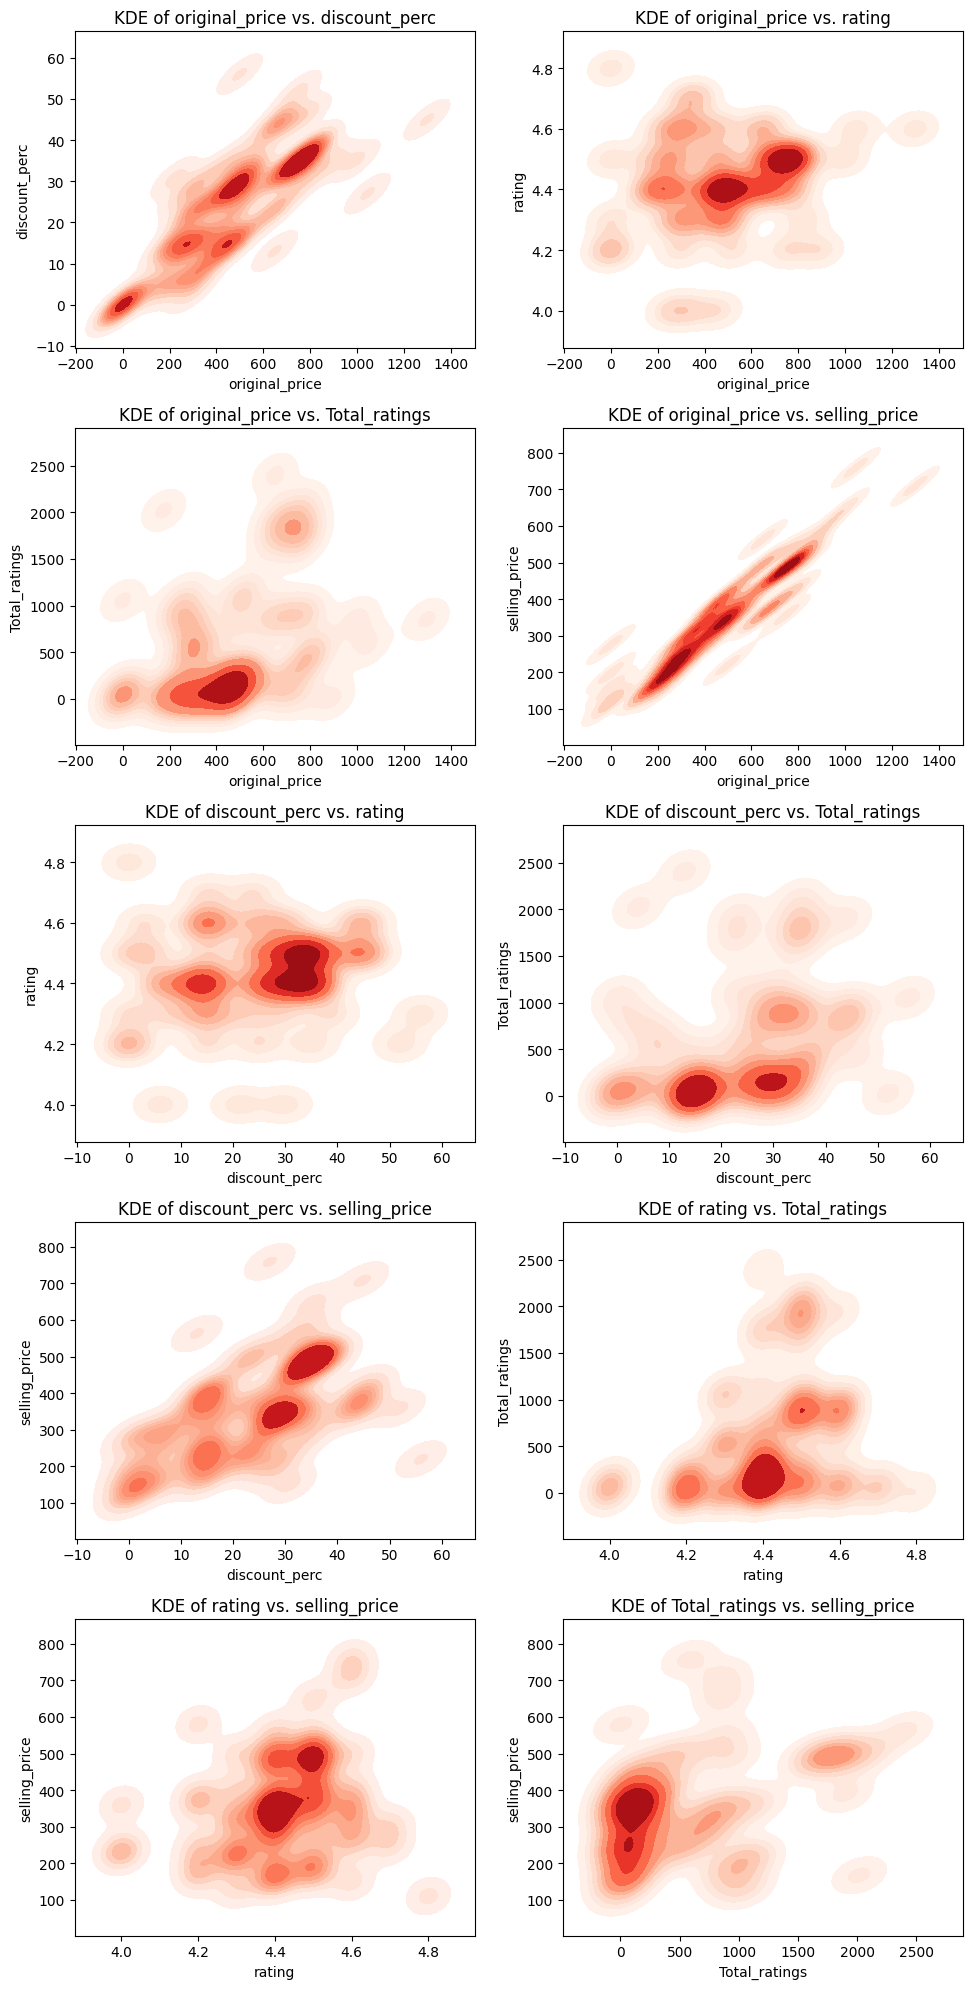

In [24]:
from itertools import combinations

ys = ['original_price', 'discount_perc', 'rating', 'Total_ratings', 'selling_price']

combs = list(combinations(ys, 2))  # Generate all combinations

# Create a 5x2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

# Flatten the 5x2 axes array for easier indexing
flat_axes = axes.flatten()

# Iterate over combinations and axes to plot
for (y1, y2), ax in zip(combs, flat_axes):
    sns.kdeplot(x=books[y1], y=books[y2], cmap="Reds", fill=True, bw_adjust=.5, ax=ax)
    ax.set_title(f"KDE of {y1} vs. {y2}")
    ax.set_xlabel(y1)
    ax.set_ylabel(y2)

# Turn off any remaining unused subplots
for i in range(len(combs), 10):
    flat_axes[i].axis('off')

plt.tight_layout()
plt.show()

In [25]:
books_for_heatmap = books[['original_price', 'discount_perc', 'rating', 'Total_ratings','selling_price']].copy()
books_for_heatmap.head()

,original_price,discount_perc,rating,Total_ratings,selling_price
71,0.0,0.0,4.8,4.0,110
717,360.0,15.0,4.7,39.0,306
18,330.0,24.0,4.7,78.0,248
69,1299.0,45.0,4.6,853.0,709
45,300.0,3.0,4.6,824.0,289


<Axes: >

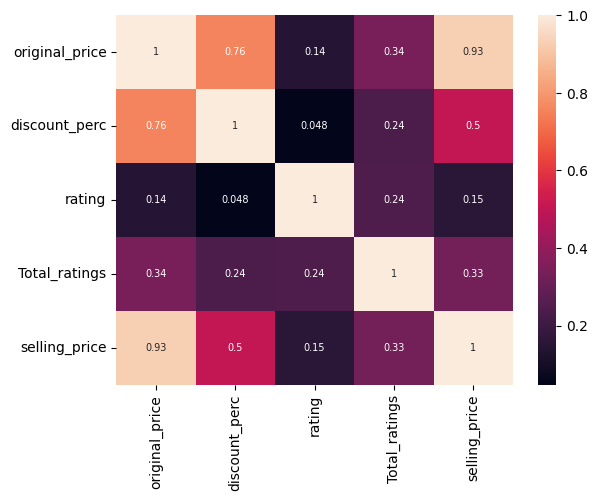

In [26]:
sns.heatmap(books_for_heatmap.corr(), annot=True, annot_kws={"size": 7})